In [1]:
%pylab inline
import matplotlib.pyplot as plt

from ipywidgets import *
from mpl_toolkits.mplot3d import Axes3D


Populating the interactive namespace from numpy and matplotlib


In [2]:
# #############################################################
# A szivarvany keletkezesehez 
# a vizcseppen beluli sugarmenetek rajzolasa
# #############################################################

In [3]:
# a szinekhez tartozo toroesmutatok:
nred = 1.33; ngreen = 1.335; nblue = 1.34; 

#  'r' ---> red, 'g' ---> green, 'b' ---> blue
nszinek = {"r":nred, "g":ngreen, "b":nblue}   #   dictionary type variable

In [4]:
nszinek['b']

1.34

In [5]:
# A Descartes =sugarhoz tartozo kritikus bc impaktparameter szamolasa
# p = a hurok szama a vizcseppen belul, n = a toresmutato

def bc(p, n):
    tmp=sqrt((p*p - n*n)/(p*p - 1));
    return(tmp)

In [6]:
bc(2,nred)

0.86238042649401536

In [7]:
# Egy sugarmenet rajzolasa adott (bimpact,phur,ntores, szin) parameterek mellett.
#
# bimpact = a bemeno fenysugar impakt parametere, 0 < bimpact < 1,
# phur = hurok szama a vizcseppen belul, 
# ntores = toresmutato,
# szin = a fenysugar szine a rajzon.

def rainbowray_rajz(bimpact,phur,ntores,szin):
    
    #plt.figure()
    
    figsize(10,10)
   
    ax=subplot(aspect='equal')
    
    alpha=arcsin(bimpact)
    beta=arcsin(bimpact/ntores)

    
    fi=[];
    for i in range(0,phur+1):
        fi.append(pi-(alpha+i*(pi-2*beta)))  

    x=cos(fi)
    y=sin(fi)
   
    t = np.arange(0.0, 2.0*pi, 0.01)
    
    plot(cos(t), sin(t), color='k', lw=3)
    plot(x,y,color=szin,lw=2)
    
    #arrow( x, y, dx, dy, **kwargs )
   
    #bemeno fenysugar
    nyilbe=1
    xbe=(nyilbe+cos(alpha))
    ybe=sin(alpha)
    x1=-xbe+0.5*nyilbe
   
    arrow(-xbe,ybe,0.5*nyilbe,0,
          head_width=0.03, head_length=0.05, fc=szin, ec=szin,lw=2)
    arrow(x1,ybe,-x1-cos(alpha),0,
          head_width=0.03, head_length=0.05, fc=szin, ec=szin,lw=2)
    
    #kimeno fenysugar
    fimax=fi[phur]
    xki=cos(fimax)
    yki=sin(fimax)
    nyilki=1.5
    arrow(xki,yki,nyilki*cos(-alpha+fimax),nyilki*sin(-alpha+fimax),
          head_width=0.03, head_length=0.05, fc=szin, ec=szin,lw=2)
    
    xlim(-2.5,2.5)
    ylim(-2.5,2.5)
    plt.axis('off')
     
    
    return ()

In [8]:
# Tobb sugarmenet rajzolasa adott (nn, phur, ntores, szin) parameterek mellett, 
#
# nn = a vizcseppre bemeno parhuzamos fenysugarak szama, 
# phur = hurok szama a vizcseppen belul, 
# ntores = toresmutato,
# szin = a fenysugar szine a rajzon. 

def rainbowray_rajz_multi(nn,phur,ntores,szin):
 
    for j in range(0,abs(nn)):
     
        alpha=j*pi/2/nn
        bb=sin(alpha)
        subplot(1,1,1,aspect='equal')
        rainbowray_rajz(bb,phur,ntores,szin)
    return()
        

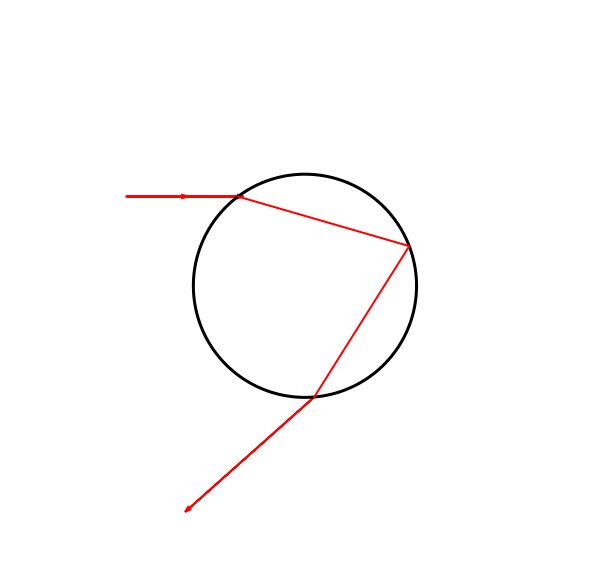

In [9]:
# Egy bejovo fenysugar kulonbozo impakt parameterrel (piros szinnel) 

@interact(b=(0,1,.01),phur=(0,17,1))
def play(b=0.8,phur=2):

    rainbowray_rajz(b,phur,nred,'r')
    plt.show()

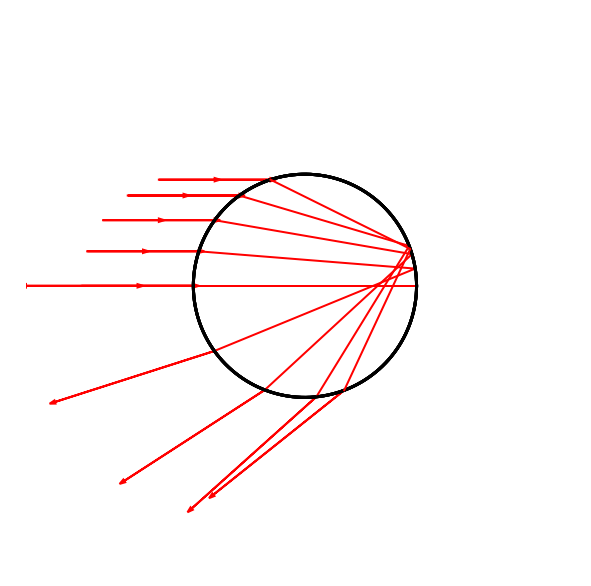

In [10]:
# A bejovo parhuzamos fenysugarak (piros szinnel) 

@interact(nn=(0,57,1),phur=(0,17,1))
def play(nn=5,phur=2):

    rainbowray_rajz_multi(nn,phur,nred,'r')
    #rainbowray_rajz(bc(phur,nred),phur,nred,'b')
    plt.show()

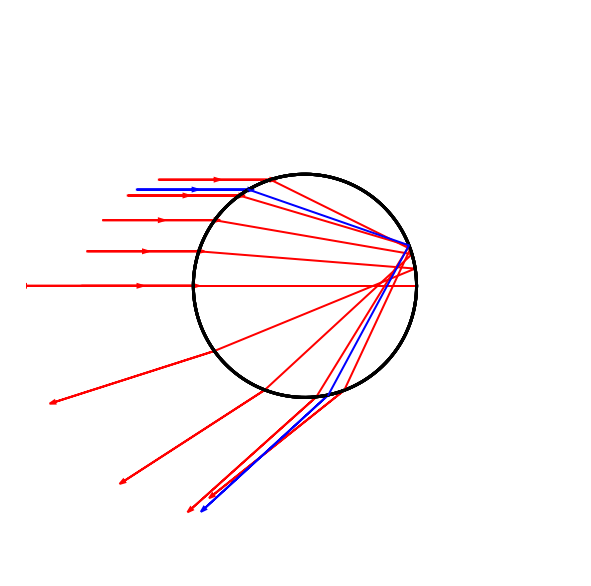

In [11]:
# A bejovo parhuzamos fenysugarak (piros szinnel, nn darab) 
# es a Descartes sugarak (kek szinnel) egyutt

@interact(nn=(1,57,1),phur=(2,17,1))
def play(nn=5,phur=2):

    rainbowray_rajz_multi(nn,phur,nred,'r')
    rainbowray_rajz(bc(phur,nred),phur,nred,'b')
    plt.show()

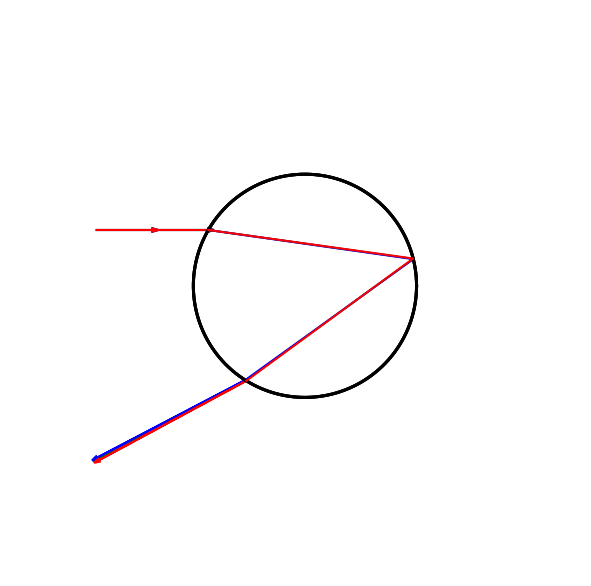

In [12]:
# Egy-egy, kulonbozo szinu bejovo fenysugar adott impakt parameterrel 
 
@interact(b=(-1,1,.01),phur=(0,17,1))
def play(b=0.5,phur=2):

    rainbowray_rajz(b,phur,ngreen,'g')
    rainbowray_rajz(b,phur,nblue,'b')
    rainbowray_rajz(b,phur,nred,'r')
    
    #rainbowray_rajz(bc(phur,nred),phur,nred,'b')
    plt.show()

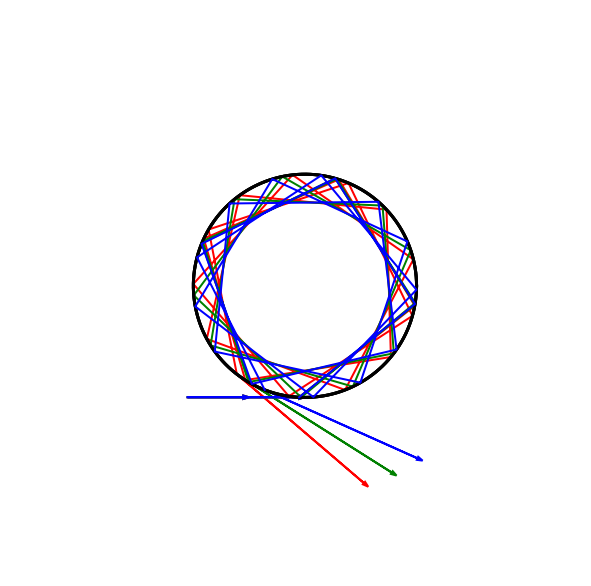

In [13]:
# Descartes sugarak kulonbozo szinu fenysugarakra

pp=17;  #  a hurok szama a vizcseppen belul

rainbowray_rajz(-bc(pp,nred),pp,nred,'r')
rainbowray_rajz(-bc(pp,ngreen),pp,ngreen,'g')
rainbowray_rajz(-bc(pp,nblue),pp,nblue,'b')

plt.show()

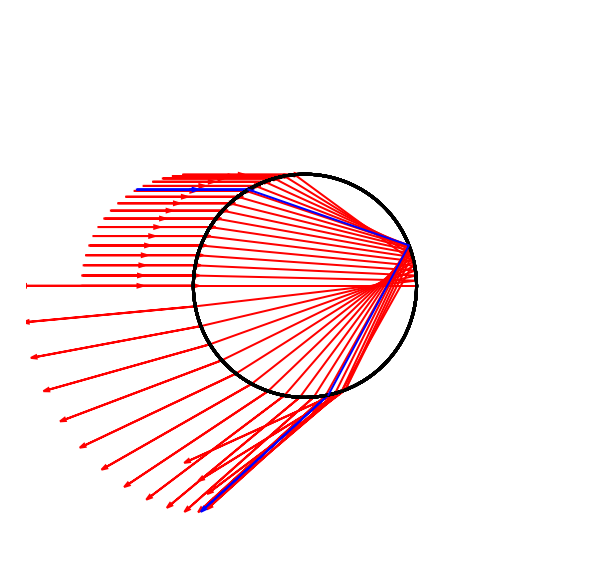

In [14]:
phur=2;
nn=17;

rainbowray_rajz_multi(nn,phur,nred,'r')
rainbowray_rajz(bc(phur,nred),phur,nred,'b')
plt.show()

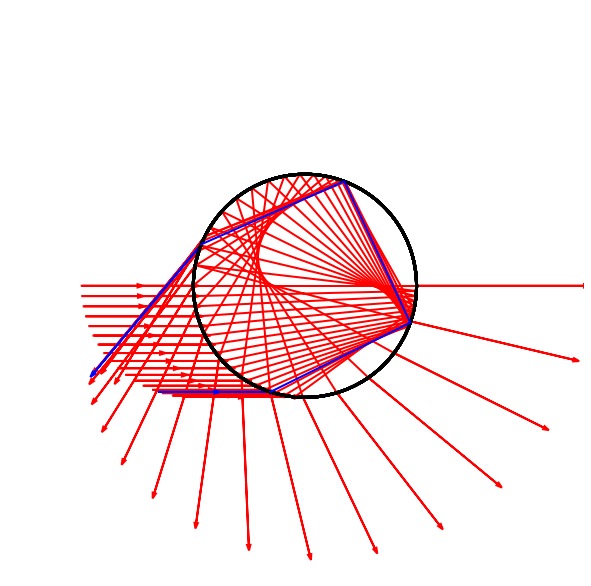

In [15]:
phur=3;
nn=-17;

rainbowray_rajz_multi(nn,phur,nred,'r')
rainbowray_rajz(-bc(phur,nred),phur,nred,'b')
plt.show()

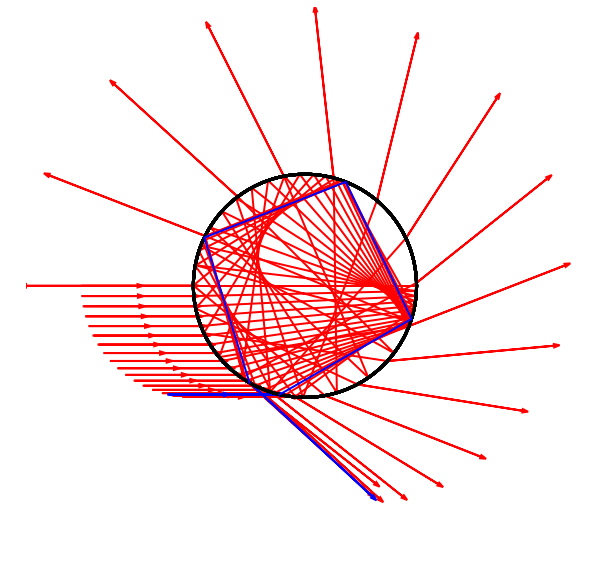

In [16]:
phur=4;
nn=-17;

rainbowray_rajz_multi(nn,phur,nred,'r')
rainbowray_rajz(-bc(phur,nred),phur,nred,'b')
plt.show()

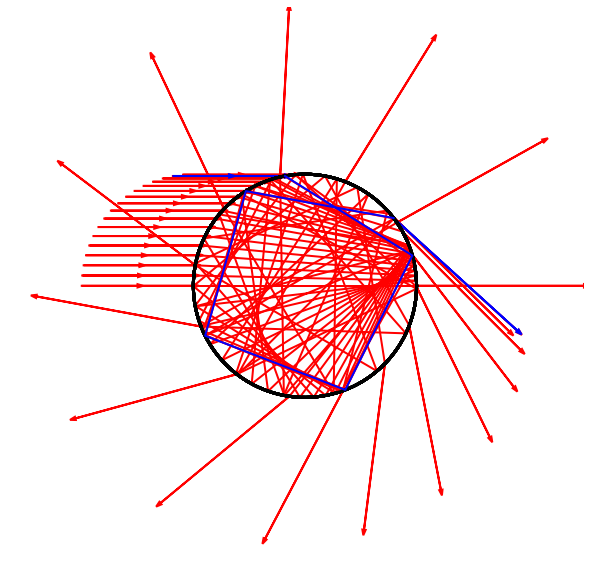

In [17]:
phur=5;
nn=17;

rainbowray_rajz_multi(nn,phur,nred,'r')
rainbowray_rajz(bc(phur,nred),phur,nred,'b')
plt.show()

In [18]:
# Az elterules szoge a b impakt parameter fuggvenyeben, adott p es ntores toresmutato eseten

def theta(b,p,ntores):
    x=(p-1)*pi + 2*arcsin(b) - 2*p*arcsin(b/ntores)
    theta=arccos(cos(x))*180/pi  #  az elterules szoge fokban 
    return(theta)

In [19]:
theta(.1,2,nred)

174.23025022113652

In [20]:
theta(bc(2,nred),2,nred)

137.48361827891551

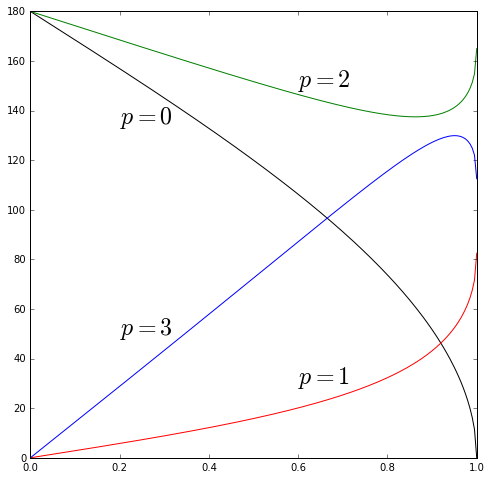

In [21]:
x=linspace(0,1,200)

figsize(8,8)   

plt.text(.2, 135,r'$p=0$',fontsize=24)
plt.text(.6, 30,r'$p=1$',fontsize=24)
plt.text(.6, 150,r'$p=2$',fontsize=24)
plt.text(.2, 50,r'$p=3$',fontsize=24)

    
plot(x,theta(x,0,nred), color='k')
plot(x,theta(x,1,nred), color='r')
plot(x,theta(x,2,nred), color='g')
plot(x,theta(x,3,nred), color='b')
#plot(x,theta(x,5,nred), color='b')

plt.show()

In [22]:
ntores=nred;

phurmax=17;

tt=[];
bbc=[];

for i in range(2,phurmax+1):
    tt.append([i,theta(bc(i,ntores),i,ntores)])
    bbc.append([i,bc(i,ntores)])
    
print(tt)
print()
print(bbc)
    

[[2, 137.48361827891551], [3, 129.89875192161526], [4, 42.845076053785071], [5, 42.28752302169918], [6, 126.51051265055602], [7, 149.77243093536086], [8, 66.366716691454684], [9, 16.833455902454293], [10, 99.890692909863674], [11, 177.15554138305561], [12, 94.279115293957119], [13, 11.462028362605849], [14, 71.308527709362281], [15, 154.04191763238717], [16, 123.25485174930503], [17, 40.576432562286058]]

[[2, 0.86238042649401536], [3, 0.95072998269750597], [4, 0.97403285365535797], [5, 0.98385085251779913], [6, 0.9889547151267486], [7, 0.99195829045378714], [8, 0.99387888502334032], [9, 0.99518277215795892], [10, 0.99610909710399353], [11, 0.9967911014851607], [12, 0.99730791480017689], [13, 0.99770898276286668], [14, 0.99802651421539046], [15, 0.99828222999023963], [16, 0.99849121472467295], [17, 0.99866421200187871]]


In [23]:
len(tt)

16

In [24]:
tt[0][1]

137.48361827891551

In [25]:
tt[len(tt)-1][0]

17

In [26]:
 nszinek['r']

1.33

[[2, 137.48361827891551], [3, 129.89875192161526], [4, 42.845076053785071], [5, 42.28752302169918], [6, 126.51051265055602], [7, 149.77243093536086], [8, 66.366716691454684], [9, 16.833455902454293], [10, 99.890692909863674], [11, 177.15554138305561], [12, 94.279115293957119], [13, 11.462028362605849], [14, 71.308527709362281], [15, 154.04191763238717], [16, 123.25485174930503], [17, 40.576432562286058]]

[[2, 0.86238042649401536], [3, 0.95072998269750597], [4, 0.97403285365535797], [5, 0.98385085251779913], [6, 0.9889547151267486], [7, 0.99195829045378714], [8, 0.99387888502334032], [9, 0.99518277215795892], [10, 0.99610909710399353], [11, 0.9967911014851607], [12, 0.99730791480017689], [13, 0.99770898276286668], [14, 0.99802651421539046], [15, 0.99828222999023963], [16, 0.99849121472467295], [17, 0.99866421200187871]]


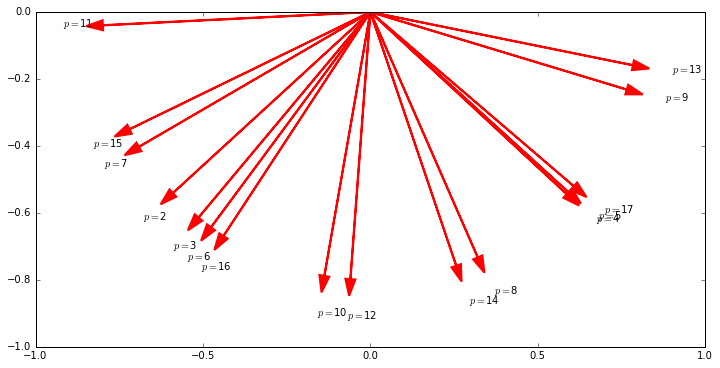

In [27]:
szin='r'   #  'r' ---> red, 'g' ---> green, 'b' ---> blue 

ntores = nszinek[szin]

phurmax = 17;

tt=[];
bbc=[];

for i in range(2,phurmax+1):
    tt.append([i,theta(bc(i,ntores),i,ntores)])
    bbc.append([i,bc(i,ntores)])
    
print(tt)
print()
print(bbc)
    
    
figsize(12,12)
   
ax=subplot(aspect='equal')

imin=2;
imax=tt[len(tt)-1][0]-1;

#imin = 3
#imax = 5

for i in range(0,imax):
    szog=pi/180*tt[i][1];
    
    sc=0.8;
    xveg=sc*cos(szog)
    yveg=-sc*sin(szog)

    pp=tt[i][0]
    textout= '$p =$' + str(pp)
    
    arrow(0,0,xveg,yveg,head_width=0.03, 
          head_length=0.05, fc=szin, ec=szin,lw=2)
    scale=1.15
    text(xveg*scale,yveg*scale, textout)
    
xlim(-1,1)
ylim(-1,0)

plt.show()

[[2, 42.516381721084485], [3, 50.101248078384742], [4, 137.15492394621492], [5, 137.71247697830083], [6, 53.489487349443976], [7, 30.227569064639141], [8, 113.63328330854532], [9, 163.16654409754571], [10, 80.109307090136326], [11, 2.8444586169443937], [12, 85.720884706042881], [13, 168.53797163739415], [14, 108.69147229063772], [15, 25.958082367612832], [16, 56.745148250694967], [17, 139.42356743771393]]


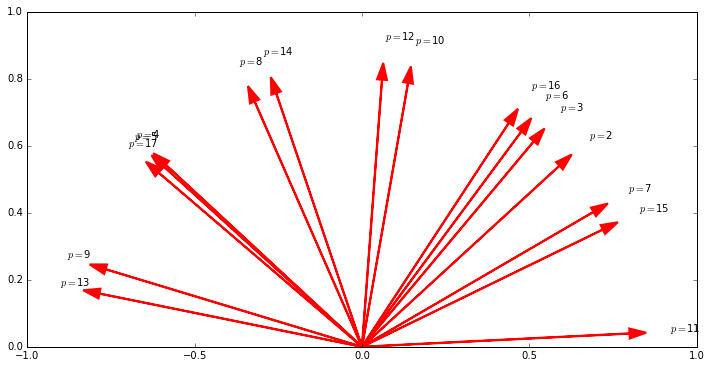

In [33]:
szin='r'   #  'r' ---> red, 'g' ---> green, 'b' ---> blue 

ntores = nszinek[szin]

phurmax=17;

tt=[];
ttfok=[];
bbc=[];

for i in range(2,phurmax+1):
    tt.append([i,theta(bc(i,ntores),i,ntores)])
    ttfok.append([i,180-theta(bc(i,ntores),i,ntores)])
    bbc.append([i,bc(i,ntores)])
    
print(ttfok)
#print()
#print(bbc)
    
    
figsize(12,12)
   
ax=subplot(aspect='equal')

imin=2;
imax=tt[len(tt)-1][0]-1;

#imin = 3
#imax = 5

for i in range(0,imax):
    szog=pi/180*(180-tt[i][1]);
    
    sc=0.8;
    xveg=sc*cos(szog)
    yveg=sc*sin(szog)

    pp=tt[i][0]
    textout= '$p =$' + str(pp)
    
    arrow(0,0,xveg,yveg,head_width=0.03, 
          head_length=0.05, fc=szin, ec=szin,lw=2)
    scale=1.15
    text(xveg*scale,yveg*scale, textout)
    
xlim(-1,1)
ylim(0,1)

plt.show()

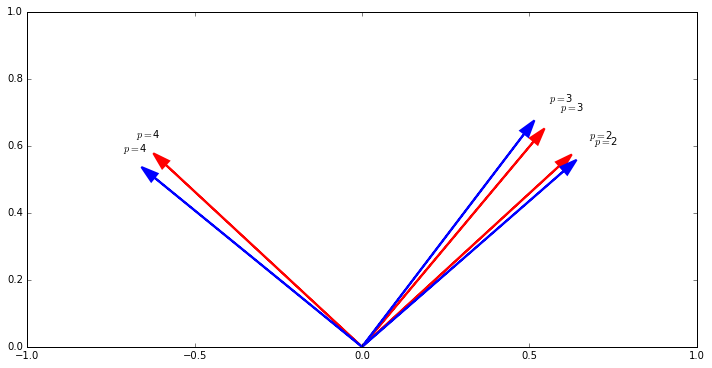

In [29]:
szin='r'   #  'r' ---> red, 'g' ---> green, 'b' ---> blue 

ntores = nszinek[szin]

phurmax = 4;

tt=[];
bbc=[];

for i in range(2,phurmax+1):
    tt.append([i,theta(bc(i,ntores),i,ntores)])
    bbc.append([i,bc(i,ntores)])
    
figsize(12,12)
   
ax=subplot(aspect='equal')

imin=2;
imax=tt[len(tt)-1][0]-1;

for i in range(0,imax):
    szog=pi/180*(180-tt[i][1]);
    
    sc=0.8;
    xveg=sc*cos(szog)
    yveg=sc*sin(szog)

    pp=tt[i][0]
    textout= '$p =$' + str(pp)
    
    arrow(0,0,xveg,yveg,head_width=0.03, 
          head_length=0.05, fc=szin, ec=szin,lw=2)
    scale=1.15
    text(xveg*scale,yveg*scale, textout)


szin='b'   #  'r' ---> red, 'g' ---> green, 'b' ---> blue 

ntores = nszinek[szin]

tt=[];
bbc=[];

for i in range(2,phurmax+1):
    tt.append([i,theta(bc(i,ntores),i,ntores)])
    bbc.append([i,bc(i,ntores)]) 

imin=2;
imax=tt[len(tt)-1][0]-1;

for i in range(0,imax):
    szog=pi/180*(180-tt[i][1]);
    
    sc=0.8;
    xveg=sc*cos(szog)
    yveg=sc*sin(szog)

    pp=tt[i][0]
    textout= '$p =$' + str(pp)
    
    arrow(0,0,xveg,yveg,head_width=0.03, 
          head_length=0.05, fc=szin, ec=szin,lw=2)
    scale=1.15
    text(xveg*scale,yveg*scale, textout)
    
xlim(-1,1)
ylim(0,1)

plt.show()
